In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [37]:
data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/dataset/Google_train_data.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [25]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [27]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [28]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [29]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [38]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [31]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 17s - loss: 0.0325 - 17s/epoch - 482ms/step
Epoch 2/20
35/35 - 6s - loss: 0.0109 - 6s/epoch - 159ms/step
Epoch 3/20
35/35 - 6s - loss: 0.0088 - 6s/epoch - 161ms/step
Epoch 4/20
35/35 - 6s - loss: 0.0077 - 6s/epoch - 161ms/step
Epoch 5/20
35/35 - 6s - loss: 0.0073 - 6s/epoch - 159ms/step
Epoch 6/20
35/35 - 6s - loss: 0.0086 - 6s/epoch - 169ms/step
Epoch 7/20
35/35 - 6s - loss: 0.0070 - 6s/epoch - 167ms/step
Epoch 8/20
35/35 - 6s - loss: 0.0069 - 6s/epoch - 177ms/step
Epoch 9/20
35/35 - 6s - loss: 0.0079 - 6s/epoch - 174ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0059 - 6s/epoch - 177ms/step
Epoch 11/20
35/35 - 6s - loss: 0.0054 - 6s/epoch - 179ms/step
Epoch 12/20
35/35 - 6s - loss: 0.0061 - 6s/epoch - 167ms/step
Epoch 13/20
35/35 - 6s - loss: 0.0058 - 6s/epoch - 175ms/step
Epoch 14/20
35/35 - 6s - loss: 0.0053 - 6s/epoch - 159ms/step
Epoch 15/20
35/35 - 6s - loss: 0.0050 - 6s/epoch - 166ms/step
Epoch 16/20
35/35 - 6s - loss: 0.0047 - 6s/epoch - 176ms/step
Epoch 17/20
35/

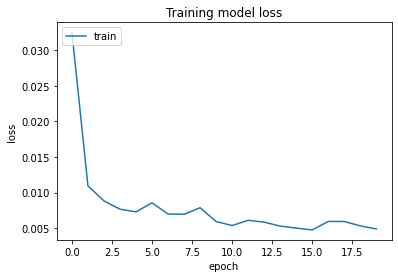

In [32]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [33]:
testData = pd.read_csv("C:\Users\HP\OneDrive\Desktop\dataset\Google_test_data.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [34]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 3s 59ms/step


array([[1.3057238],
       [1.3093446],
       [1.3226019],
       [1.3421034],
       [1.356674 ],
       [1.3538219],
       [1.3350691],
       [1.3114668],
       [1.2976292],
       [1.2958571],
       [1.2904959],
       [1.279405 ],
       [1.2692606],
       [1.2598177],
       [1.2589153],
       [1.265611 ],
       [1.2880532],
       [1.3219894],
       [1.3592031],
       [1.394356 ],
       [1.4049069],
       [1.3954607],
       [1.3665398],
       [1.3294588],
       [1.2990098],
       [1.2850201],
       [1.2862636],
       [1.2910191],
       [1.2860214],
       [1.2746717],
       [1.2608844],
       [1.244846 ],
       [1.2208947],
       [1.1917292],
       [1.181257 ],
       [1.1951045],
       [1.2234162],
       [1.2536116],
       [1.2799455],
       [1.2904211],
       [1.3004665],
       [1.3143598],
       [1.3321952],
       [1.3493961],
       [1.3607025],
       [1.360757 ],
       [1.347763 ],
       [1.3369268],
       [1.3353089],
       [1.3445654],


In [20]:
predicted_price = sc.inverse_transform(y_pred)

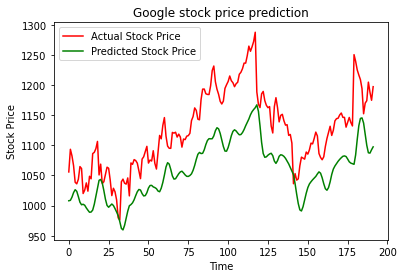

In [21]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [39]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)

NameError: name 'r2_score' is not defined